<a href="https://colab.research.google.com/github/AlexeiAltamira/Portfolio/blob/main/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalação das bibliotécas

In [1]:
import pandas as pd #Importar principais bibliotecas para auxiliar na leitura, manipulação, tratamento e análise dos dados
import matplotlib.pyplot as plt #Importar a biblioteca para criação de gráficos
from sklearn.preprocessing import MinMaxScaler #Importa a ferramenta para realizar um pré-processamento, colocando os dados na mesma escala.
import seaborn as sns #Importar a biblioteca para criação de gráficos

# Carregar arquivo

In [2]:
dados = pd.read_csv('https://query.data.world/s/oljkx7rumqrpch24deaqhf225ikrdh?dws=00000')
#Usa biblioteca pandas para abrir arquivo data.csv, que contem os dados a serem analisados, direto do site.

# Análise dos dados

CHURN (Abandono): Indica se o usuário abandonou ou não a empresa.

ACCOUNTLENGTH (Longitud de cuenta): Faz referência à duração das
contas.

INTERNATIONALPLAN (Plano internacional): Indica se o cliente registra um plano
com chamadas e mensagens para o exterior.

VOICEMAILPLAN (Plano de correio de voz): Indica se o cliente registra um plano com correio de voz.

NUMBERVMAILMESSAGES (Número de mensagens de correio eletrônico): Indica
o número de mensagens de correio eletrônico que foram enviadas ao cliente.

TOTALDAYMINUTES (total de minutos por dia): Indica o número de minutos que o
cliente esteve durante o dia.

TOTALDAYCALLS (total de chamadas diárias): Indica o número de chamadas que o
usuário realizava diariamente.

TOTALDAYCHARGE (Carga total por dia): Indica o valor que o usuário cancelou
por chamadas ou mensagens realizadas durante o dia.

TOTALEVEMINUTES (Total de minutos): indica o número total de minutos que o
usuário conversou.

TOTALEVECALLS (Total de chamadas): Indica o número total de chamadas que o
usuário realizou.

TOTALEVECHARGE (Total de cargas): Indica o valor que o usuário cancelou por
chamadas ou mensagens realizadas.

TOTALNIGHTMINUTES (Minutos por noite): Indica o número de minutos
definidos durante a noite.

TOTAL NIGHT CALLS (chamadas por noite): Indica o número de chamadas
efetuadas pelo usuário durante a noite.

TOTAL NIGHT CHARGE (Carga total noturna): Indica o número de cargas que o
usuário faz na noite para realizar chamadas ou enviar mensagens.

TOTAL INTL MINUTES (Minutos internacionais): Indica o número de minutos
que o usuário conversou com familiares ou amigos no exterior.

TOTAL INTL CALLS (Chamadas Internacionais): Indica o número de chamadas que o usuário realizou para a chamada para o estrangeiro.

TOTAL INTL CHARGE (Total de carga internacional): montante econômico que o
usuário tende a cancelar suas mensagens e chamadas para o exterior.

CUSTOMER SERVICE CALLS (Chamadas de atendimento ao cliente): Indica o número de chamadas que o usuário realizou como pessoal de atendimento ao cliente da empresa para dar a conhecer algo para reclamo.

In [3]:
dados.head()
#Verificar se o arquivo a ser analisado esta correto. Podendo ser visualizado os dados iniciais

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [4]:
dados.info()
#Verifica se há dados faltantes e dtype dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       5000 non-null   object 
 1   accountlength               5000 non-null   int64  
 2   internationalplan           5000 non-null   object 
 3   voicemailplan               5000 non-null   object 
 4   numbervmailmessages         5000 non-null   int64  
 5   totaldayminutes             5000 non-null   float64
 6   totaldaycalls               5000 non-null   int64  
 7   totaldaycharge              5000 non-null   float64
 8   totaleveminutes             5000 non-null   float64
 9   totalevecalls               5000 non-null   int64  
 10  totalevecharge              5000 non-null   float64
 11  totalnightminutes           5000 non-null   float64
 12  totalnightcalls             5000 non-null   int64  
 13  totalnightcharge            5000 

In [5]:
dados.isna().sum()
#Verificar e contar dados nulos em todas em alguma coluna.

churn                         0
accountlength                 0
internationalplan             0
voicemailplan                 0
numbervmailmessages           0
totaldayminutes               0
totaldaycalls                 0
totaldaycharge                0
totaleveminutes               0
totalevecalls                 0
totalevecharge                0
totalnightminutes             0
totalnightcalls               0
totalnightcharge              0
totalintlminutes              0
totalintlcalls                0
totalintlcharge               0
numbercustomerservicecalls    0
dtype: int64

In [6]:
dados.duplicated().sum()
#Identificar se há linhas duplicadas

0

In [7]:
dados.describe()
#Verificar concentração dos dados e/ ou discrepantes

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Pré-processamento

In [8]:
dados = dados.replace({'No': 0, 'no': 0, 'Yes': 1, 'yes': 1})
#Transforma os valores da coluna 'Churned' de 0 para 'No' e 1 para 'Yes'

In [9]:
dados.columns

Index(['churn', 'accountlength', 'internationalplan', 'voicemailplan',
       'numbervmailmessages', 'totaldayminutes', 'totaldaycalls',
       'totaldaycharge', 'totaleveminutes', 'totalevecalls', 'totalevecharge',
       'totalnightminutes', 'totalnightcalls', 'totalnightcharge',
       'totalintlminutes', 'totalintlcalls', 'totalintlcharge',
       'numbercustomerservicecalls'],
      dtype='object')

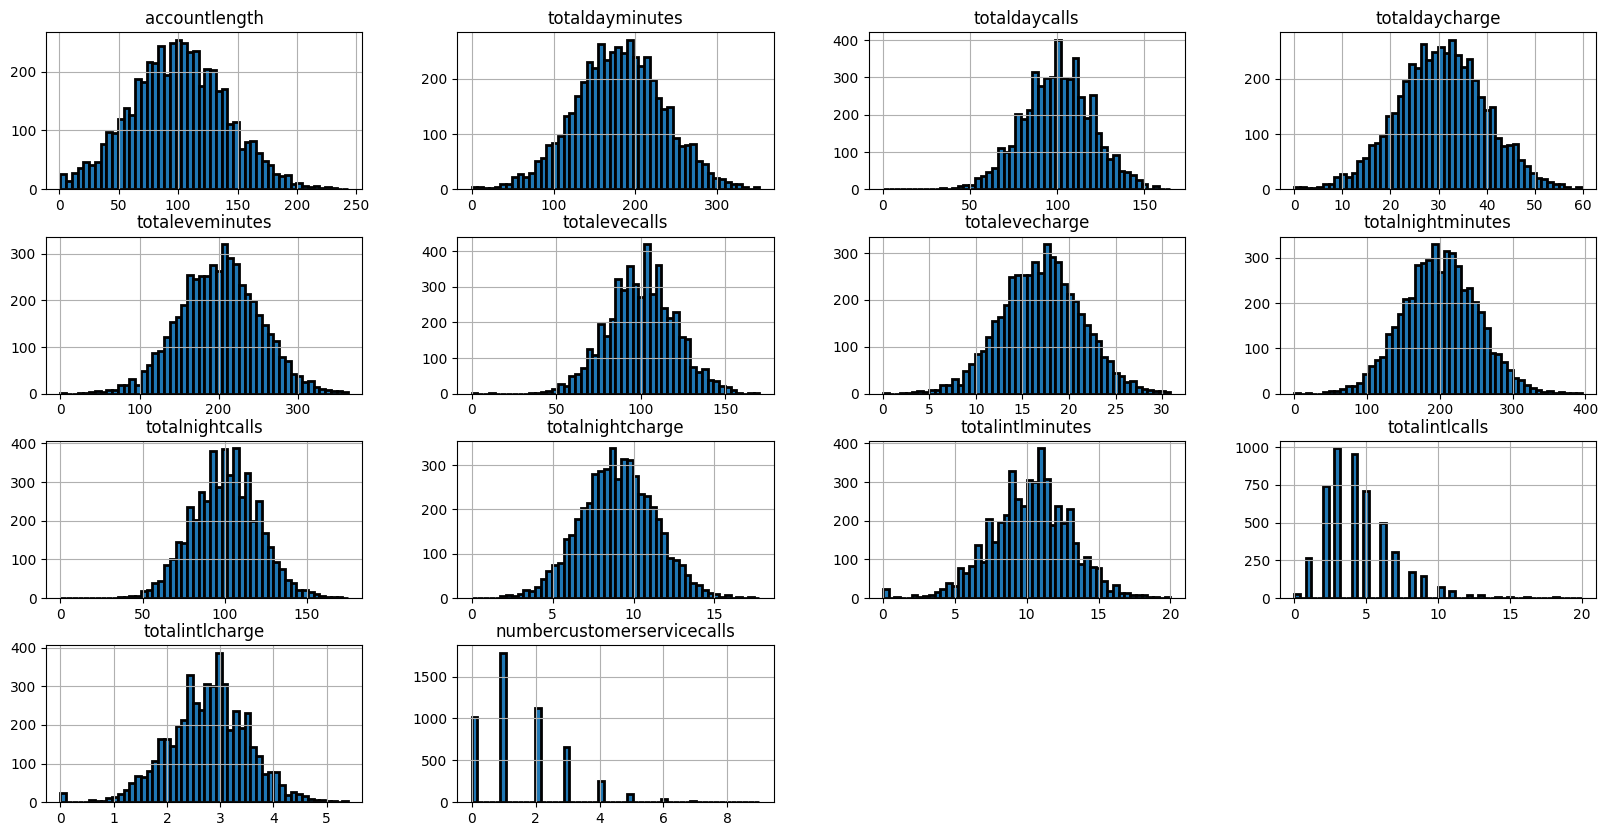

In [10]:
dados[['accountlength', 'totaldayminutes', 'totaldaycalls', 'totaldaycharge', 'totaleveminutes', 'totalevecalls', 'totalevecharge', 'totalnightminutes', 'totalnightcalls',
       'totalnightcharge', 'totalintlminutes', 'totalintlcalls', 'totalintlcharge', 'numbercustomerservicecalls']].hist(bins=50, figsize=(20,10), edgecolor='black', linewidth=2)
plt.show()

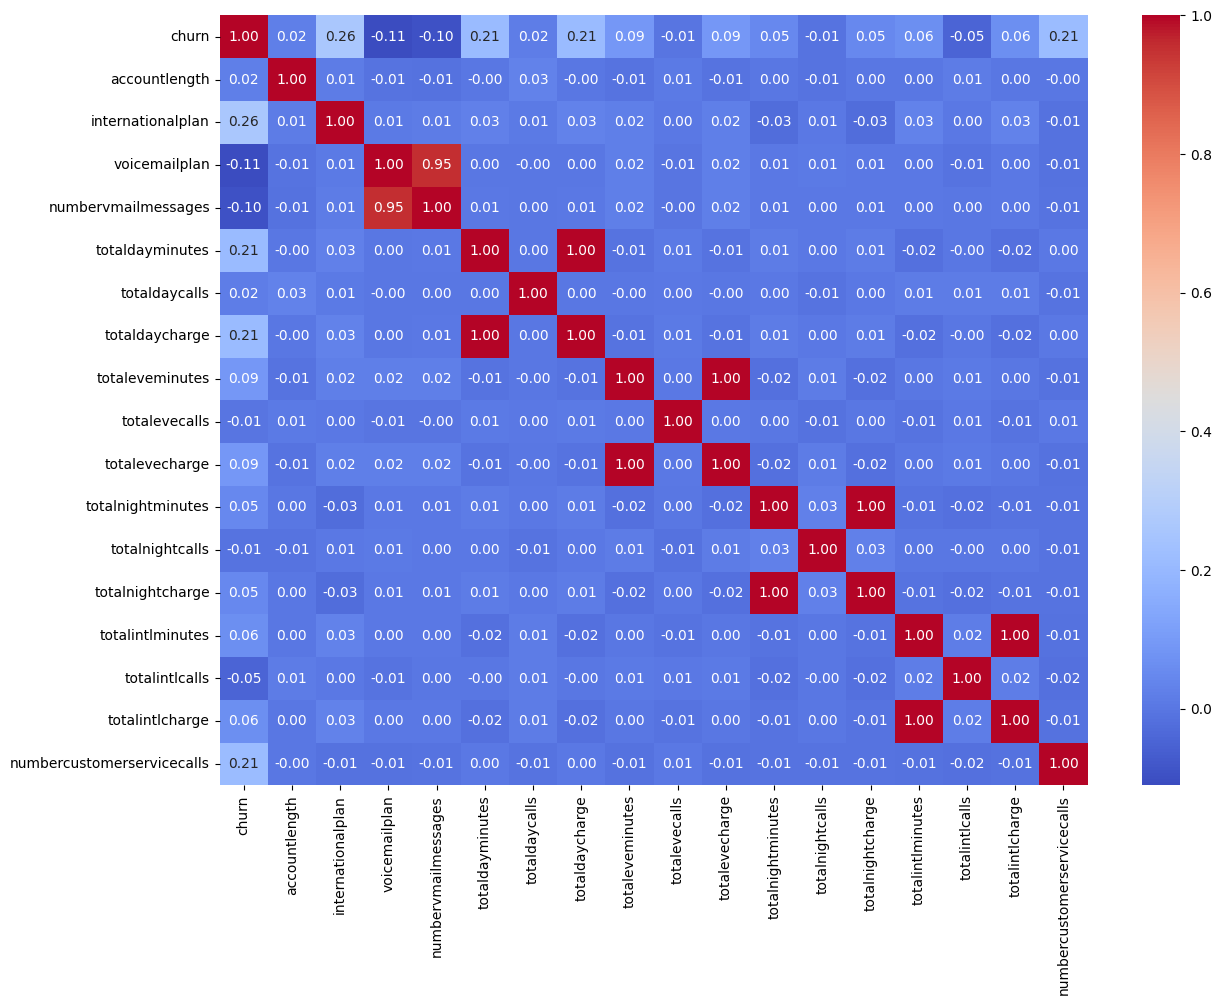

In [11]:
correlation_matrix = dados.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [12]:
X = dados.drop(columns=["churn"], axis=1)
# Separar os dados em fatores preditores e previsores (X e Y)
y = dados[["churn"]]

In [13]:
mm = MinMaxScaler()
#Uso da ferramenta importada no inicio para atribuir valor dentro da escala de 0 a 1.

X = pd.DataFrame(mm.fit_transform(X))
 #Ajusta e transformar os dados em um dataframe do pandas

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Separa os dados em treino e teste

# Modelagem e Desenvolvimento

In [15]:
from sklearn.linear_model import LogisticRegression #Importa a ferramente para realizar predições com regressão logistica
model = LogisticRegression()

In [16]:
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
lr.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [18]:
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,churn,label
1501,0.293388,0.0,0.0,0.000000,0.774964,0.533333,0.774933,0.296673,0.735294,0.296668,0.469620,0.462857,0.469893,0.635,0.10,0.635185,0.000000,0,0
2586,0.214876,0.0,0.0,0.000000,0.466856,0.642424,0.466867,0.566401,0.329412,0.566483,0.492911,0.708571,0.492966,0.570,0.10,0.570370,0.111111,0,0
2653,0.636364,0.0,1.0,0.576923,0.175249,0.624242,0.175201,0.701402,0.647059,0.701391,0.571899,0.548571,0.572313,0.620,0.25,0.620370,0.111111,0,0
1055,0.661157,0.0,0.0,0.000000,0.506686,0.660606,0.506693,0.402805,0.505882,0.402782,0.348354,0.445714,0.348340,0.425,0.10,0.425926,0.111111,0,0
705,0.404959,0.0,0.0,0.000000,0.178947,0.490909,0.178882,0.635139,0.376471,0.635393,0.427595,0.691429,0.427687,0.425,0.25,0.425926,0.111111,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711,0.103306,1.0,0.0,0.000000,0.553058,0.636364,0.553046,0.655210,0.588235,0.655451,0.605316,0.737143,0.605515,0.480,0.25,0.479630,0.000000,0,0
2313,0.657025,0.0,0.0,0.000000,0.728307,0.672727,0.728246,0.515260,0.358824,0.515367,0.301519,0.462857,0.301632,0.575,0.20,0.575926,0.333333,0,0
3214,0.611570,1.0,0.0,0.000000,0.514651,0.478788,0.514558,0.535881,0.488235,0.536072,0.500759,0.622857,0.500844,0.440,0.45,0.440741,0.333333,0,1
2732,0.533058,1.0,0.0,0.000000,0.615078,0.642424,0.614960,1.000000,0.505882,1.000000,0.320759,0.702857,0.320765,0.845,0.10,0.844444,0.555556,1,1


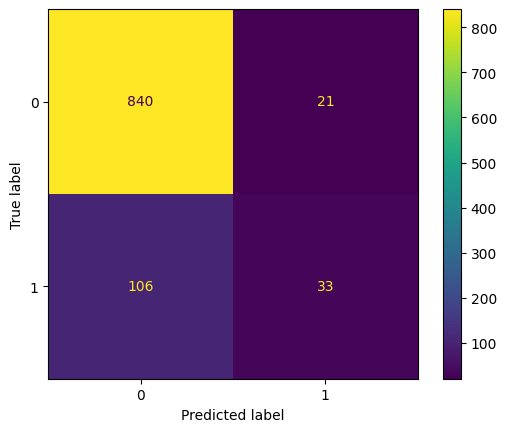

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt #Importar a biblioteca para criação de gráficos
#Criação de um grafico para avaliar visualmente o desempenho do algoritmo, permite a visualização seus erros e acertos
predictions = lr.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()

In [20]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
#Uso das metricas importadas no inicio.
print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.86475
Acurácia (Teste): 0.873
Acurácia Balanceada (Treino): 0.579596753012246
Acurácia Balanceada (Teste): 0.6065099140200035
Precision (Treino): 0.5754189944134078
Precision (Teste): 0.6111111111111112
Recall (Treino): 0.1813380281690141
Recall (Teste): 0.23741007194244604
F1-Score (Treino): 0.27576974564926376
F1-Score (Teste): 0.3419689119170985
ROCAUC (Treino): 0.8290817164056599
ROCAUC (Teste): 0.8293184267916677
